In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris(as_frame=True)
x=data.data
y=data.target

In [4]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
x["classes"]=y

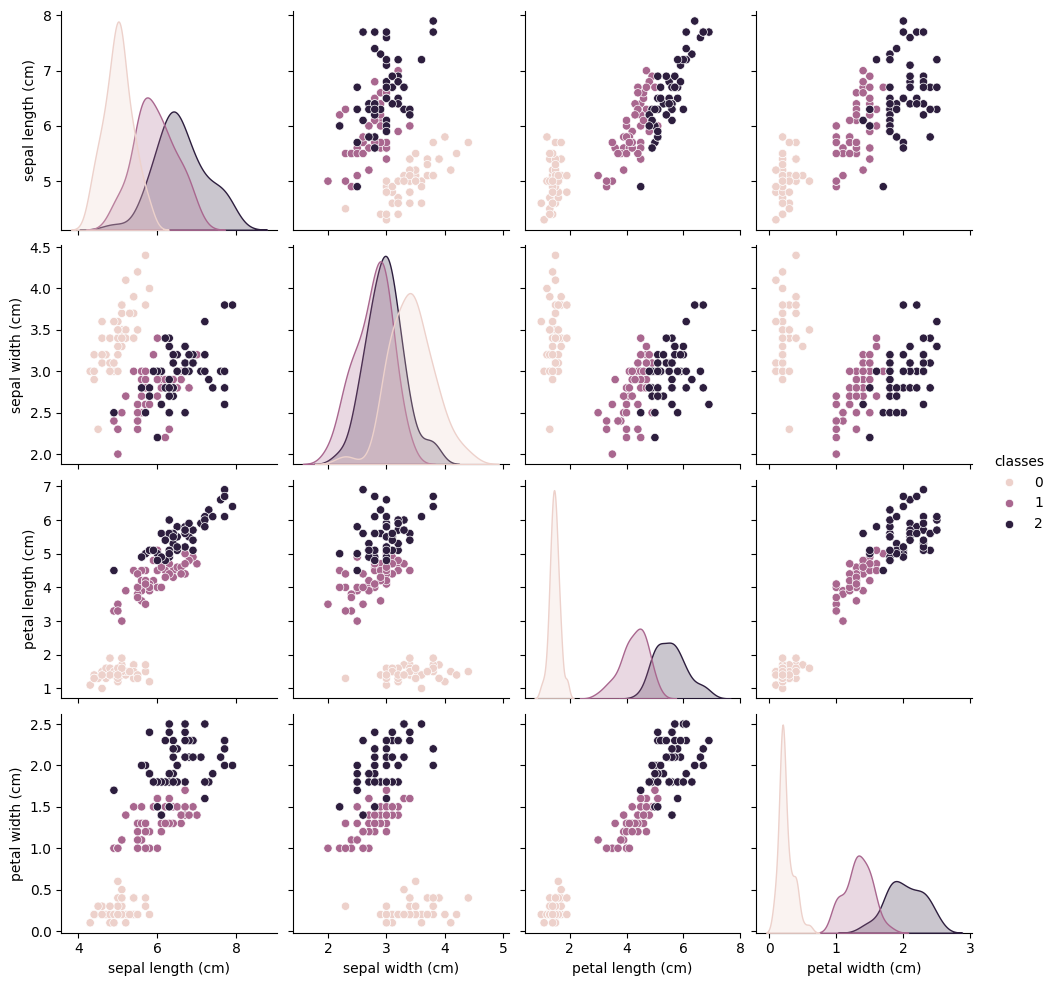

In [8]:
sns.pairplot(data=x,hue="classes")

<Axes: >

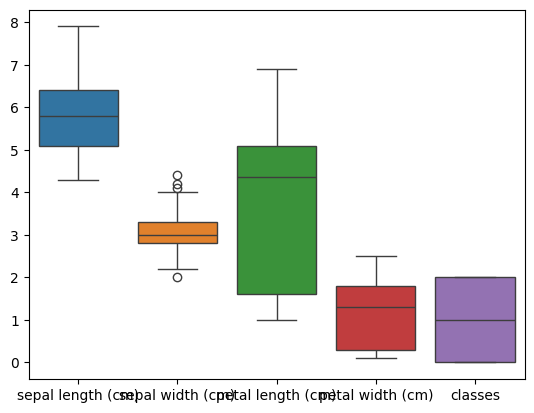

In [9]:
sns.boxplot(x)

In [10]:
x=data.data
y=data.target

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,shuffle=True,stratify=y)

In [12]:
ytrain.value_counts()

target
0    38
2    37
1    37
Name: count, dtype: int64

In [13]:
ytest.value_counts()

target
1    13
2    13
0    12
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
xtrain=s.fit_transform(xtrain)
xtest=s.transform(xtest)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_ovr=LogisticRegression(multi_class="ovr")
model_ovr.fit(xtrain,ytrain)
ypred=model_ovr.predict(xtest)
accuracy_score(ypred,ytest)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9736842105263158

In [16]:
model_ovr.predict_proba(xtest)[0]

array([8.75229359e-01, 1.24753373e-01, 1.72681305e-05])

In [17]:
model_MN=LogisticRegression(multi_class="multinomial")
model_MN.fit(xtrain,ytrain)
ypred=model_MN.predict(xtest)
accuracy_score(ypred,ytest)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


1.0

In [18]:
model_MN.predict_proba(xtest)[0]

array([9.86205770e-01, 1.37935270e-02, 7.02919619e-07])

In [19]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [21]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(107)

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [25]:
df=df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked']]

In [26]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: >

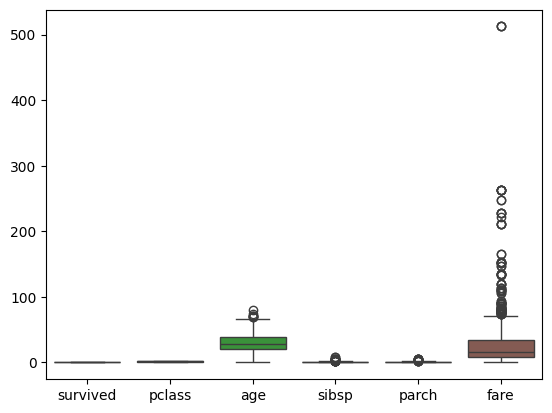

In [27]:
sns.boxplot(df)

<Axes: xlabel='farel'>

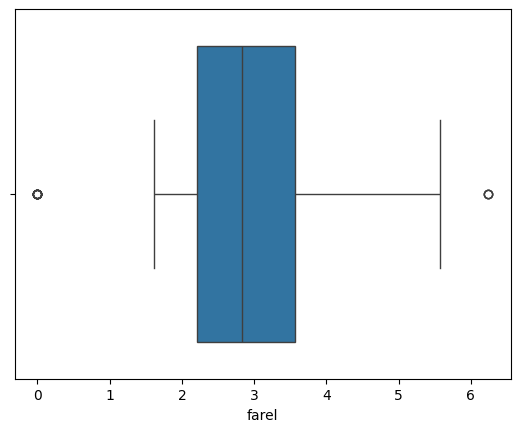

In [28]:
df["farel"]=np.log1p(df["fare"])
sns.boxplot(data=df,x="farel")

In [29]:
df.drop(columns=["fare"],inplace=True)

In [30]:
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked,farel
0,0,3,male,22.0,1,0,S,2.110213
1,1,1,female,38.0,1,0,C,4.280593
2,1,3,female,26.0,0,0,S,2.188856
3,1,1,female,35.0,1,0,S,3.990834
4,0,3,male,35.0,0,0,S,2.202765


In [31]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [32]:
df["sex"]=LabelEncoder().fit_transform(df["sex"])
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked,farel
0,0,3,1,22.0,1,0,S,2.110213
1,1,1,0,38.0,1,0,C,4.280593
2,1,3,0,26.0,0,0,S,2.188856
3,1,1,0,35.0,1,0,S,3.990834
4,0,3,1,35.0,0,0,S,2.202765


In [33]:
df.dropna(subset=["embarked"],inplace=True)

In [34]:
one=OneHotEncoder()
encoded=pd.DataFrame(one.fit_transform(df[["embarked"]]).toarray(),columns=one.get_feature_names_out(["embarked"]),index=df.index)

In [35]:
encoded

,embarked_C,embarked_Q,embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
885,0.0,1.0,0.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [36]:
df=pd.concat([df,encoded],axis=1)

In [37]:
df.drop(columns=["embarked"],inplace=True)

In [38]:
x=df.drop(columns=["survived"])
y=df["survived"]

In [39]:
from sklearn.impute import KNNImputer

In [40]:
x.isna().sum()

pclass          0
sex             0
age           106
sibsp           0
parch           0
farel           0
embarked_C      0
embarked_Q      0
embarked_S      0
dtype: int64

In [41]:
imp=KNNImputer(n_neighbors=5)
x=imp.fit_transform(x)

In [42]:
pd.DataFrame(x).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [43]:
df.columns.drop(["survived"])

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'farel', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [44]:
x=pd.DataFrame(x,columns=df.columns.drop(["survived"]))
x.head()

,pclass,sex,age,sibsp,parch,farel,embarked_C,embarked_Q,embarked_S
0,3.0,1.0,22.0,1.0,0.0,2.110213,0.0,0.0,1.0
1,1.0,0.0,38.0,1.0,0.0,4.280593,1.0,0.0,0.0
2,3.0,0.0,26.0,0.0,0.0,2.188856,0.0,0.0,1.0
3,1.0,0.0,35.0,1.0,0.0,3.990834,0.0,0.0,1.0
4,3.0,1.0,35.0,0.0,0.0,2.202765,0.0,0.0,1.0


In [45]:
y.value_counts()

survived
0    461
1    321
Name: count, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [48]:
y.value_counts()

survived
0    461
1    461
Name: count, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,shuffle=True,stratify=y)

In [50]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
xtrain[["age","farel"]]=s.fit_transform(xtrain[["age","farel"]])
xtest[["age","farel"]]=s.transform(xtest[["age","farel"]])

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
model=KNeighborsClassifier(n_neighbors=5,p=2,weights="uniform")
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)

0.8181818181818182

In [53]:
from sklearn.metrics import confusion_matrix

[[96 22]
 [20 93]]


<Axes: >

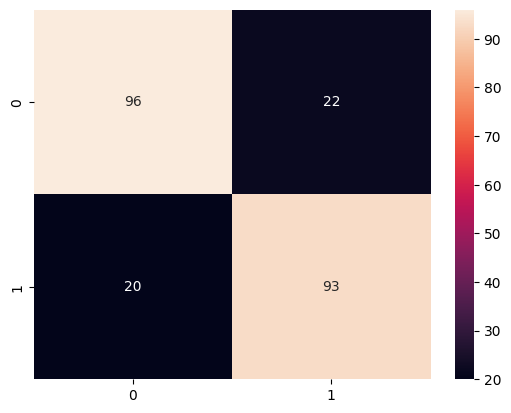

In [54]:
cm=confusion_matrix(ypred,ytest)
print(cm)
sns.heatmap(cm,annot=True)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       118
           1       0.81      0.82      0.82       113

    accuracy                           0.82       231
   macro avg       0.82      0.82      0.82       231
weighted avg       0.82      0.82      0.82       231



In [56]:
from sklearn.metrics import roc_auc_score,roc_curve
print(roc_auc_score(ypred,ytest))

0.8182840857957103


Text(0.5, 0, 'fpr')

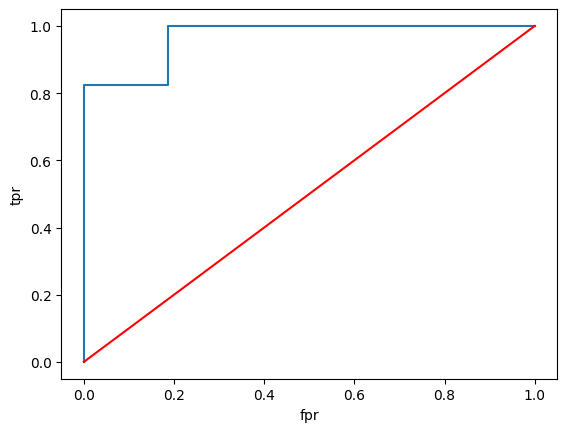

In [57]:
fpr,tpr,thd=roc_curve(ypred,ytest)
plt.step(fpr,tpr)
plt.plot([1,0],[1,0],c="red")
plt.ylabel("tpr")
plt.xlabel("fpr")

In [58]:
acc=[]
for k in range(2,20):
    model=KNeighborsClassifier(n_neighbors=k,p=2,weights="uniform")
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    acc.append(accuracy_score(ypred,ytest))

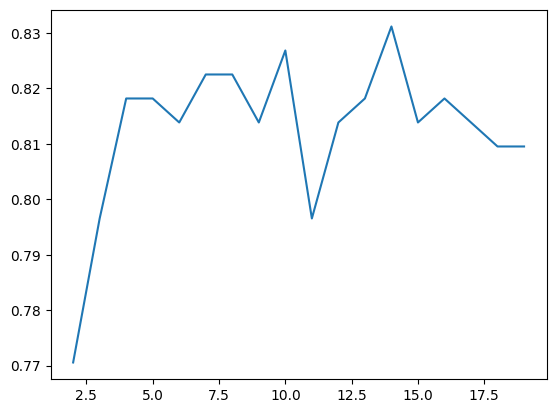

In [59]:
plt.plot(np.arange(2,20) , acc)

In [60]:
acc

[0.7705627705627706,
 0.7965367965367965,
 0.8181818181818182,
 0.8181818181818182,
 0.8138528138528138,
 0.8225108225108225,
 0.8225108225108225,
 0.8138528138528138,
 0.8268398268398268,
 0.7965367965367965,
 0.8138528138528138,
 0.8181818181818182,
 0.8311688311688312,
 0.8138528138528138,
 0.8181818181818182,
 0.8138528138528138,
 0.8095238095238095,
 0.8095238095238095]

knn regression

In [130]:
df=pd.read_csv(r"D:\ALL\ai/Expanded_data_with_more_features.csv")

In [131]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [132]:
df["target"]=(df["MathScore"]+df["WritingScore"]+df["ReadingScore"])/3

In [133]:
df=df.dropna()


In [134]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,target
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,78.666667
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89,89.000000
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39,41.000000


In [135]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["Gender","LunchType","EthnicGroup", "ParentEduc", "TestPrep",
            "ParentMaritalStatus", "PracticeSport",
            "IsFirstChild", "TransportMeans", "WklyStudyHours"]

l=LabelEncoder()
for col in cat_cols:
    df[col]=l.fit_transform(df[col])

In [136]:
x=df.drop(columns=["target"])
y=df["target"]

In [137]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,shuffle=True)

In [138]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
xtrain=s.fit_transform(xtrain)
xtest=s.transform(xtest)

In [139]:
from sklearn.neighbors import KNeighborsRegressor


In [140]:
model=KNeighborsRegressor(n_neighbors=7,p=2)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [141]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [142]:
mean_absolute_error(ypred,ytest)

2.5432787956171867

In [143]:
mean_squared_error(ypred,ytest)

10.843619426569214